<a href="https://colab.research.google.com/github/anjusukumaran4/British_Airways_virtual_Internship/blob/main/British_Airways_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 - Web scraping to gain company insights

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source (Skytrax) and analysing this data to gain company insights


In [ ]:
#importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

###Data Collection

In [ ]:
pages = 10
page_size = 100

#create empty lists
reviews = []
rating = []
date = []
country = []

In [ ]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for i in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(i.get_text())
    for i in parsed_content.find_all('div', {"class": "rating-10"})[1:]:
        rating.append(i.span.text)
    for i in parsed_content.find_all('time'):
        date.append(i.text)
    for i in parsed_content.find_all('h3'):
        country.append(i.span.next_sibling.text.strip(" ()"))

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [ ]:
print(len(reviews))

1000


In [ ]:
print(len(country))

1000


In [ ]:
#create a dataframe
df = pd.DataFrame({'review': reviews,'country':country,'date':date,'rating':rating})

In [ ]:
df.head()

,review,country,date,rating
0,Not Verified | We had to change from AA to BA...,United States,8th August 2024,2
1,✅ Trip Verified | After paying $6500 for ticke...,United States,8th August 2024,2
2,✅ Trip Verified | An excellent flight on BA Ci...,Lebanon,7th August 2024,8
3,✅ Trip Verified | Crew were amazing and atte...,United Kingdom,7th August 2024,10
4,Not Verified | I flew internationally for the...,United States,5th August 2024,1


In [ ]:
#create a dataframe from csv file
df.to_csv(r'D:\data\BA_reviews.csv')

###Data Exploration and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1000 non-null   object
 1   country  1000 non-null   object
 2   date     1000 non-null   object
 3   rating   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


No null values present in the dataset

In [ ]:
df.isnull().sum()

,0
review,0
country,0
date,0
rating,0


In [ ]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (1000, 4)


In [ ]:
#Removing Duplicate values

def check_duplicate(df):
  if df.duplicated().all():
    return "Duplicate data present in the DataFrame"
  else:
      return "No duplicate data found"

In [ ]:
check_duplicate(df)

'No duplicate data found'

In [ ]:
df.review = df.review.str.split("|",expand =True)[1]

In [ ]:
df['year'] = df.date.str.split(" ",expand =True)[2]

In [ ]:
import re


# Function to remove ordinal suffixes
def remove_suffixes(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply the function to remove suffixes
df['date'] = df['date'].apply(remove_suffixes)

In [ ]:

# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [ ]:
df.head()

,review,country,date,rating,year
0,We had to change from AA to BA for a flight ...,United States,2024-08-08,2,2024
1,After paying $6500 for tickets for my family ...,United States,2024-08-08,2,2024
2,An excellent flight on BA CityFlyer. The plan...,Lebanon,2024-08-07,8,2024
3,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024
4,I flew internationally for the first time in...,United States,2024-08-05,1,2024


###EDA

In [ ]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-21-fcc46be5eb16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country',data =df,palette='rocket_r')


<Axes: xlabel='count', ylabel='country'>

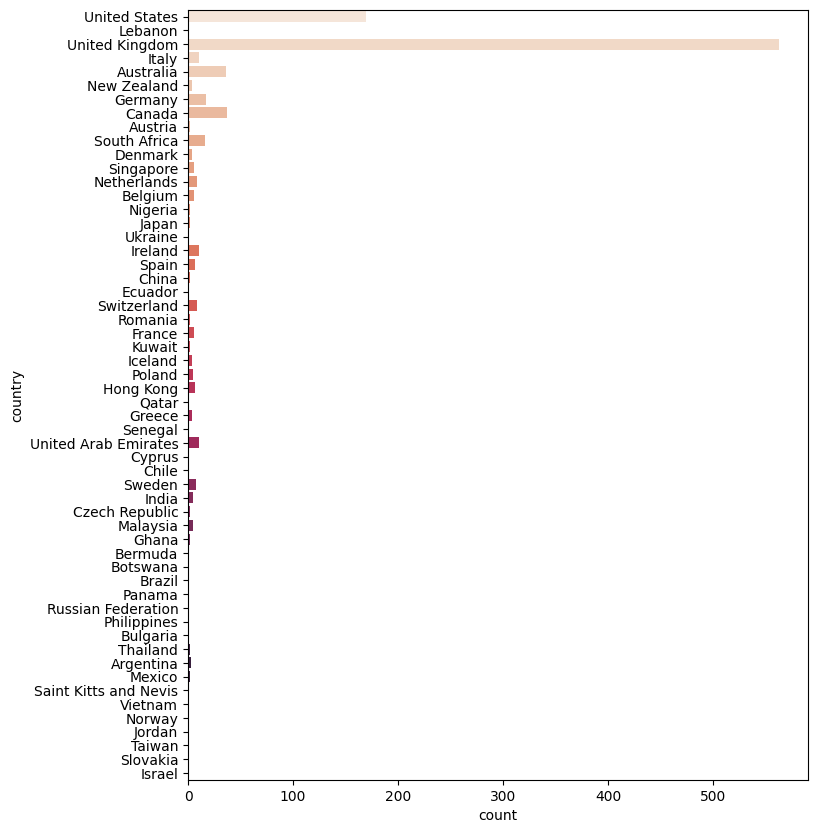

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(y='country',data =df,palette='rocket_r')

###Top 10 countries with the most reviews

In [ ]:
top_10 = df['country'].value_counts()[:10].rename_axis('country').reset_index(name = 'count')
top_10.style.background_gradient(cmap='Blues')

,country,count
0,United Kingdom,562
1,United States,169
2,Canada,37
3,Australia,36
4,Germany,17
5,South Africa,16
6,Italy,10
7,United Arab Emirates,10
8,Ireland,10
9,Netherlands,9


<ipython-input-23-0848b2492be5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['country'][:5], y=top_10['count'],palette = 'rainbow')


<Axes: title={'center': 'Top 5 countries with the most reviews'}, xlabel='country', ylabel='count'>

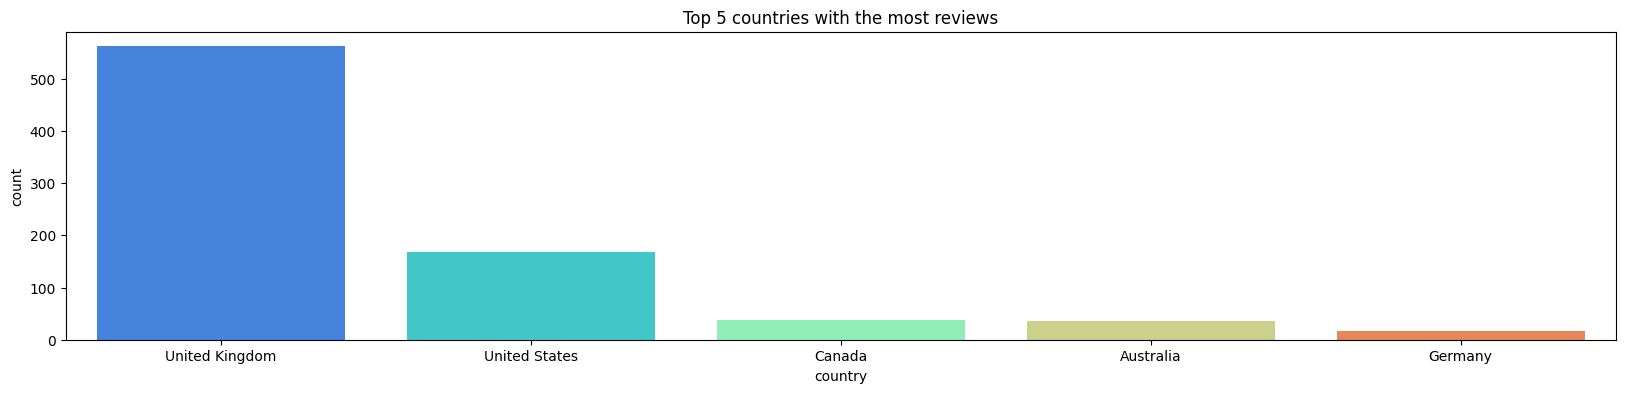

In [ ]:
plt.figure(figsize=(20,4))   #Set the width and height of the figure
plt.title("Top 5 countries with the most reviews")     #Add title

sns.barplot(x=top_10['country'][:5], y=top_10['count'],palette = 'rainbow')

In [ ]:
df['rating'] = pd.to_numeric(df['rating'])

In [ ]:
#avg 56 countries
round(df['rating'].mean(),3)

3.992

In [ ]:
#total review
len(df)

1000

In [ ]:
df['country'].nunique()

56

In [ ]:
avg_rating_per_year = round(df.groupby('year')['rating'].mean(),2)
avg_rating_per_year = avg_rating_per_year.rename_axis('year').reset_index(name = 'rating')
avg_rating_per_year

,year,rating
0,2019,4.66
1,2020,4.34
2,2021,4.30
3,2022,4.00
4,2023,3.35
5,2024,3.80


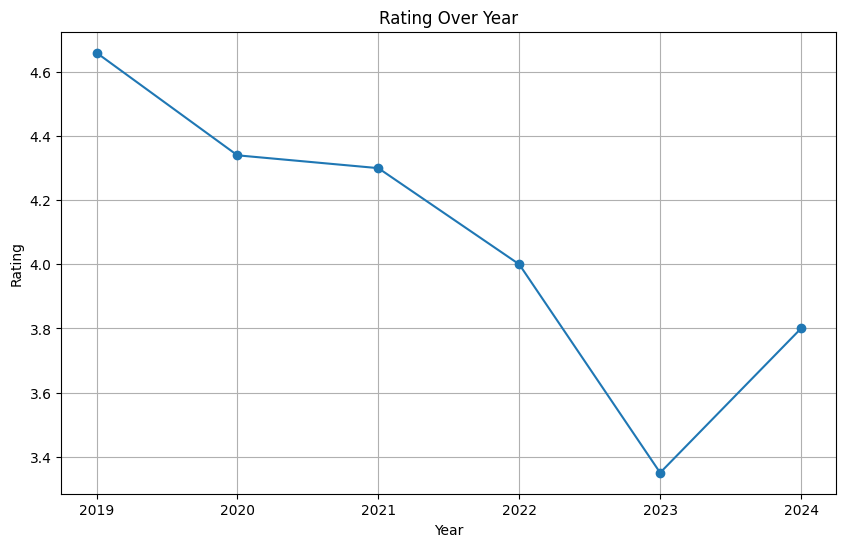

In [ ]:
# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_year['year'], avg_rating_per_year['rating'], marker='o')
plt.title('Rating Over Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
rating_count = (round(df['rating'])).value_counts().reset_index(name = 'count')
rating_count

,rating,count
0,1,373
1,2,112
2,3,98
3,10,85
4,8,76
5,9,75
6,4,56
7,5,47
8,7,41
9,6,37


<ipython-input-31-aab1e6a0aa6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count['rating'], y=rating_count['count'],palette = 'rainbow_r')


<Axes: title={'center': 'Rating Counts'}, xlabel='rating', ylabel='count'>

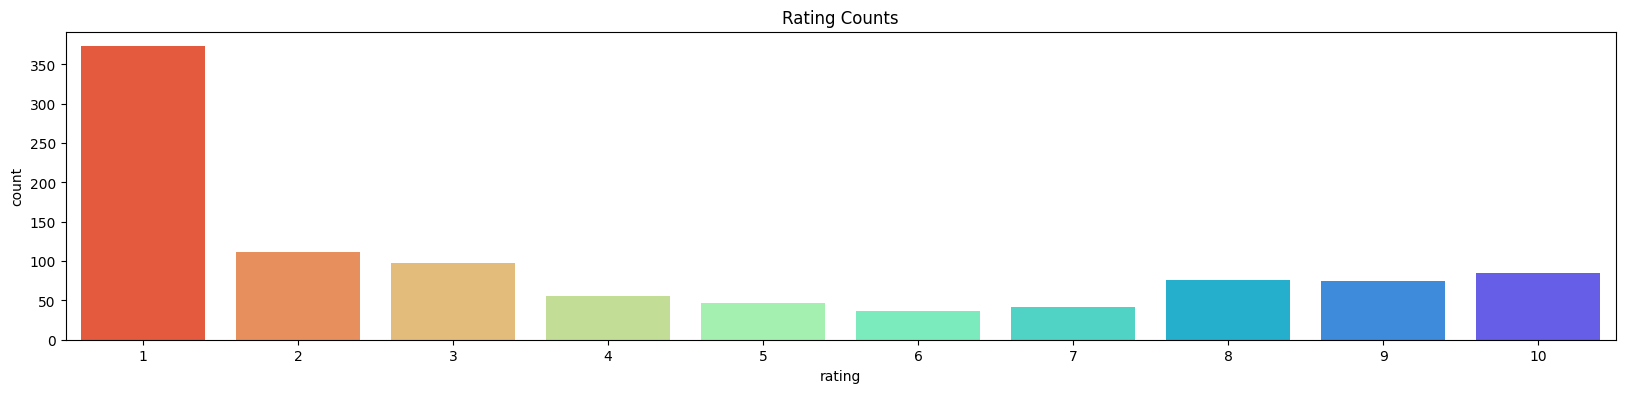

In [ ]:
plt.figure(figsize=(20,4))   #Set the width and height of the figure
plt.title("Rating Counts")     #Add title

sns.barplot(x=rating_count['rating'], y=rating_count['count'],palette = 'rainbow_r')

In [ ]:
df[df['rating']==10]

,review,country,date,rating,year
3,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024
7,"Flight cancelled due to bad weather, BA conta...",United Kingdom,2024-08-02,10,2024
54,I wanted to write this review so I could give...,United States,2024-04-07,10,2024
62,LHR to Delhi in Business. Exceptional flight...,United Kingdom,2024-03-25,10,2024
78,I upgraded at check in to Club Europe seat 1...,United Kingdom,2024-03-02,10,2024
...,...,...,...,...,...
977,BA762 Heathrow to Oslo I have flown with BA a...,United Kingdom,2019-07-01,10,2019
980,London Heathrow to New York. The staff went a...,United Kingdom,2019-06-28,10,2019
981,Gatwick to Bermuda. Boarded very quickly and...,United Kingdom,2019-06-27,10,2019
982,London Heathrow to Larnaca. Perfect. The ear...,United Kingdom,2019-06-27,10,2019


In [ ]:
df[df['rating']==1]

,review,country,date,rating,year
4,I flew internationally for the first time in...,United States,2024-08-05,1,2024
5,"BA, after subsequent delays and postponed dep...",Italy,2024-08-03,1,2024
6,It is embarrassing to have the word “Britis...,Australia,2024-08-02,1,2024
8,British Airways oversold my LHR to LAX fligh...,United States,2024-07-30,1,2024
10,When dropping off my luggage at the luggage ...,United Kingdom,2024-07-28,1,2024
...,...,...,...,...,...
978,Hamburg to Abu Dhabi via London Heathrow. Ini...,Germany,2019-06-30,1,2019
986,Amsterdam to London on 15th April. I arrived...,Australia,2019-06-24,1,2019
990,London to Seoul. Nightmare experience with Br...,United Kingdom,2019-06-16,1,2019
993,Miami to Delhi via London. The BA business ...,United States,2019-06-12,1,2019


###Word Cloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

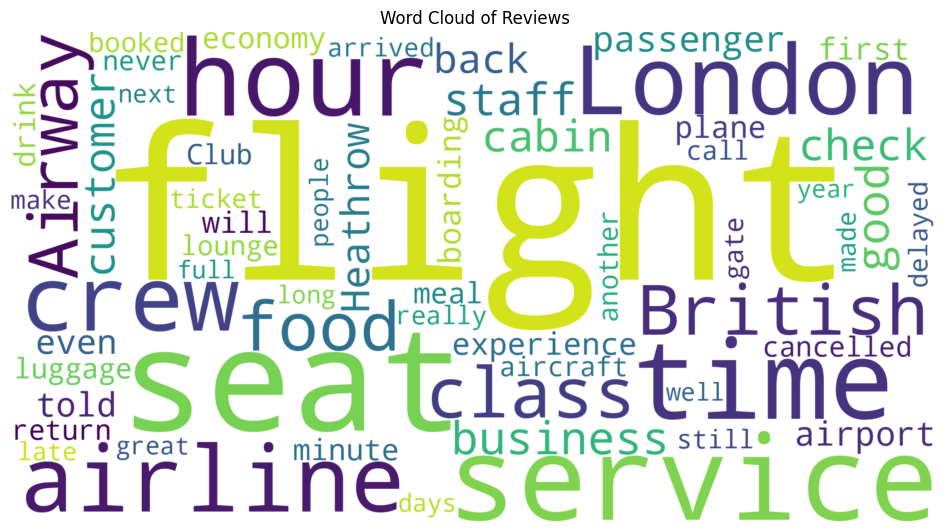

In [ ]:
# creating the text variable
text = ' '.join(df['review'])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=60, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.savefig('./review_wordcloud.jpg',dpi=720) # saving the image
plt.show()

###Sentiment Analysis

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


,review,country,date,rating,year,Sentiment,Analysis
0,We had to change from AA to BA for a flight ...,United States,2024-08-08,2,2024,-0.7011,Negative
1,After paying $6500 for tickets for my family ...,United States,2024-08-08,2,2024,0.6705,Positive
2,An excellent flight on BA CityFlyer. The plan...,Lebanon,2024-08-07,8,2024,0.9888,Positive
3,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024,0.9402,Positive
4,I flew internationally for the first time in...,United States,2024-08-05,1,2024,-0.8243,Negative


In [ ]:
sentiment_analysis = df.groupby('country')['Analysis'].value_counts().reset_index(name = 'count')
sentiment_analysis

,country,Analysis,count
0,Argentina,Negative,3
1,Australia,Negative,26
2,Australia,Positive,7
3,Australia,Neutral,3
4,Austria,Negative,1
...,...,...,...
92,United Kingdom,Neutral,38
93,United States,Negative,108
94,United States,Positive,44
95,United States,Neutral,17


In [ ]:
sentiment_analysis[sentiment_analysis['country']=='United Kingdom']

,country,Analysis,count
90,United Kingdom,Negative,275
91,United Kingdom,Positive,249
92,United Kingdom,Neutral,38


In [ ]:
sentiment_analysis[sentiment_analysis['country']=='United States']

,country,Analysis,count
93,United States,Negative,108
94,United States,Positive,44
95,United States,Neutral,17


In [ ]:
sentiment_country = df.groupby('country')['rating'].value_counts().reset_index(name = 'count')
sentiment_country[sentiment_country['rating']==10]

,country,rating,count
6,Australia,10,1
19,Brazil,10,1
22,Canada,10,3
31,Chile,10,1
34,Cyprus,10,1
40,Denmark,10,1
49,Germany,10,1
56,Hong Kong,10,1
64,India,10,1
71,Ireland,10,1
